In [1]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import pyplot
import copy
#import pylab as pyl
from pprint import pprint
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def galaxy_mag(Mc, Mp):
    # 0 magnitude meaningless in this case. ignore them
    if Mc == 0 or Mp == 0:
        return float(np.nan)
    # where Mc is the complete model magnitude and  Mp is the quasar PSF magnitude
    return -2.5*np.log10((10**(-Mc/2.5)) - 10**(-Mp/2.5))


In [3]:
# first plot both data on one graph

# read in both sets of data
LowZQuasars = fits.open('QuasarMatchComplete.fits')
lowZdata = LowZQuasars[1].data

HighZQuasars = fits.open('SDSS_HSC.fits')
highZdata = HighZQuasars[1].data

print len(highZdata)
print len(lowZdata)

total = len(highZdata) + len(lowZdata)
print total

7091
2718
9809


In [4]:
# info from both sets
# H indicates high redshift, L indicates low redshift


rmagPH = copy.copy(highZdata['rmag_psf'])
rmagCH = copy.copy(highZdata['rmag_cmodel'])
gmagPH = copy.copy(highZdata['gmag_psf'])
gmagCH = copy.copy(highZdata['gmag_cmodel'])
imagPH = copy.copy(highZdata['imag_psf'])
imagCH = copy.copy(highZdata['imag_cmodel'])
zmagPH = copy.copy(highZdata['zmag_psf'])
zmagCH = copy.copy(highZdata['zmag_cmodel'])
ymagPH = copy.copy(highZdata['ymag_psf'])
ymagCH = copy.copy(highZdata['ymag_cmodel'])
ZH = copy.copy(highZdata['Z'])



galaxy_magRH = np.zeros(len(highZdata['rmag_psf']))
galaxy_magGH = np.zeros(len(highZdata['gmag_psf']))
galaxy_magIH = np.zeros(len(highZdata['imag_psf']))
galaxy_magZH = np.zeros(len(highZdata['zmag_psf']))
galaxy_magYH = np.zeros(len(highZdata['ymag_psf']))

##########################


rmagPL = copy.copy(lowZdata['rmag_psf'])
rmagCL = copy.copy(lowZdata['rmag_cmodel'])
gmagPL = copy.copy(lowZdata['gmag_psf'])
gmagCL = copy.copy(lowZdata['gmag_cmodel'])
imagPL = copy.copy(lowZdata['imag_psf'])
imagCL = copy.copy(lowZdata['imag_cmodel'])
zmagPL = copy.copy(lowZdata['zmag_psf'])
zmagCL = copy.copy(lowZdata['zmag_cmodel'])
ymagPL = copy.copy(lowZdata['ymag_psf'])
ymagCL = copy.copy(lowZdata['ymag_cmodel'])
ZL = copy.copy(lowZdata['Z'])



galaxy_magRL = np.zeros(len(lowZdata['rmag_psf']))
galaxy_magGL = np.zeros(len(lowZdata['gmag_psf']))
galaxy_magIL = np.zeros(len(lowZdata['imag_psf']))
galaxy_magZL = np.zeros(len(lowZdata['zmag_psf']))
galaxy_magYL = np.zeros(len(lowZdata['ymag_psf']))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


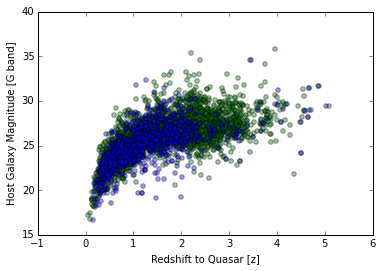

In [5]:
i = 0
galmag = 0
for i in range(len(gmagPH)):
    galmag = galaxy_mag(gmagCH[i], gmagPH[i])
    galaxy_magGH[i] = galmag
    
i = 0
galmag = 0
for i in range(len(gmagPL)):
    galmag = galaxy_mag(gmagCL[i], gmagPL[i])
    galaxy_magGL[i] = galmag

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ZH, galaxy_magGH, alpha = .4, c = 'green')
ax.scatter(ZL, galaxy_magGL, alpha = .4, c = 'blue')

ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [G band]')

fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


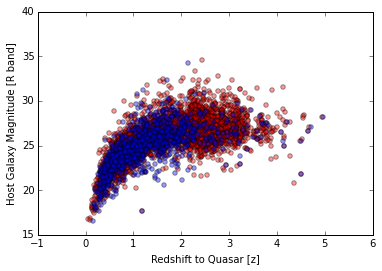

In [6]:
i = 0
galmag = 0
for i in range(len(rmagPH)):
    galmag = galaxy_mag(rmagCH[i], rmagPH[i])
    galaxy_magRH[i] = galmag
    
i = 0
galmag = 0
for i in range(len(rmagPL)):
    galmag = galaxy_mag(rmagCL[i], rmagPL[i])
    galaxy_magRL[i] = galmag

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ZH, galaxy_magRH, alpha = .4, c = 'red')
ax.scatter(ZL, galaxy_magRL, alpha = .4, c = 'blue')

ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [R band]')

fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


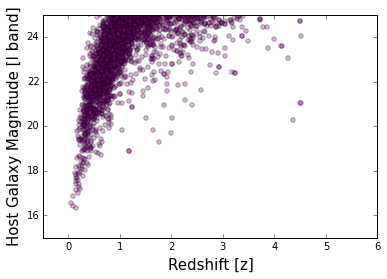

In [7]:
i = 0
galmag = 0
for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    galaxy_magIH[i] = galmag
    
    
i = 0
galmag = 0
for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    galaxy_magIL[i] = galmag

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ZH, galaxy_magIH, alpha = .3, c = 'purple')
ax.scatter(ZL, galaxy_magIL, alpha = .3, c = 'purple')

ax.set_xlabel('Redshift to Quasar [z]')
plt.xlabel('Redshift [z]', fontsize=15)

ax.set_ylabel('Host Galaxy Magnitude [I band]')
plt.ylabel('Host Galaxy Magnitude [I band]', fontsize=15)


ax.set_ylim([15, 25])
ax.set_xlim([-.5,6])


fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


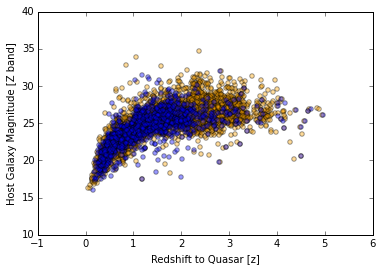

In [8]:
i = 0
galmag = 0
for i in range(len(zmagPH)):
    galmag = galaxy_mag(zmagCH[i], zmagPH[i])
    galaxy_magZH[i] = galmag
    
i = 0
galmag = 0
for i in range(len(zmagPL)):
    galmag = galaxy_mag(zmagCL[i], zmagPL[i])
    galaxy_magZL[i] = galmag

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ZH, galaxy_magZH, alpha = .4, c = 'orange')
ax.scatter(ZL, galaxy_magZL, alpha = .4, c = 'blue')

ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Z band]')

fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


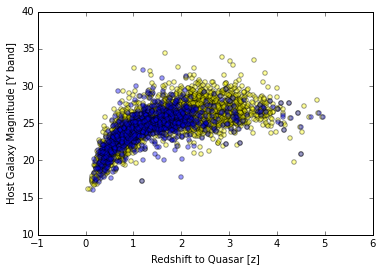

In [9]:
i = 0
galmag = 0
for i in range(len(ymagPH)):
    galmag = galaxy_mag(ymagCH[i], ymagPH[i])
    galaxy_magYH[i] = galmag
    
i = 0
galmag = 0
for i in range(len(ymagPL)):
    galmag = galaxy_mag(ymagCL[i], ymagPL[i])
    galaxy_magYL[i] = galmag

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ZH, galaxy_magYH, alpha = .4, c = 'yellow')
ax.scatter(ZL, galaxy_magYL, alpha = .4, c = 'blue')

ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Y band]')

fig.show()

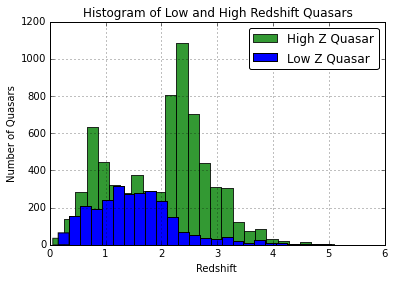

In [10]:
# the histogram of the data

# High Z data
n, bins, patches = plt.hist(ZH, 25, normed=0, facecolor='green', alpha=.8, label = 'High Z Quasar')

# Low Z data
n, bins, patches = plt.hist(ZL, 25, normed=0, facecolor='blue', alpha=1, label = 'Low Z Quasar')

plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=False)
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Histogram of Low and High Redshift Quasars')
plt.grid(True)

plt.show()

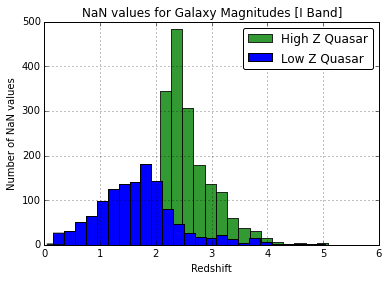

In [11]:
# the histogram of the data

# High Z data
n, bins, patches = plt.hist(ZH[np.isnan(galaxy_magIH)], 25, normed=0, facecolor='green', alpha=.8, label = 'High Z Quasar')

# Low Z data
n, bins, patches = plt.hist(ZL[np.isnan(galaxy_magIL)], 25, normed=0, facecolor='blue', alpha=1, label = 'Low Z Quasar')

plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=False)
plt.xlabel('Redshift')
plt.ylabel('Number of NaN values')
plt.title('NaN values for Galaxy Magnitudes [I Band]')
plt.grid(True)

plt.show()



In [12]:

### COLOR CALCULATION FOR LOW REDSHIFT QUASARS


galaxy_magGRL = np.zeros(len(galaxy_magGL))
galaxy_magRIL = np.zeros(len(galaxy_magRL))
galaxy_magIZL = np.zeros(len(galaxy_magIL))
galaxy_magZYL = np.zeros(len(galaxy_magZL))






for i in range(len(galaxy_magGL)):
    if galaxy_magGL[i] > 25 or galaxy_magRL[i] > 25:
        galaxy_magGRL[i] = float('nan')
    galaxy_magGRL[i] = galaxy_magGL[i] - galaxy_magRL[i]
    
    #####
    
for i in range(len(galaxy_magRIL)):
    if galaxy_magRL[i] > 25 or galaxy_magIL[i] > 25:
        galaxy_magRIL[i] = float('nan')
    galaxy_magRIL[i] = galaxy_magRL[i] - galaxy_magIL[i]
    
    ######
    
for i in range(len(galaxy_magIZL)):
    if galaxy_magIL[i] > 25 or galaxy_magZL[i] > 25:
        galaxy_magIZL[i] = float('nan')
    galaxy_magIZL[i] = galaxy_magIL[i] - galaxy_magZL[i]
    
    ######

for i in range(len(galaxy_magZYL)):
    if galaxy_magZL[i] > 25 or galaxy_magYL[i] > 25:
        galaxy_magZYL[i] = float('nan')
    galaxy_magZYL[i] = galaxy_magZL[i] - galaxy_magYL[i]
    
    
    
    ### COLOR CALCULATION FOR HIGH REDSHIFT QUASARS
    
    
    
galaxy_magGRH = np.zeros(len(galaxy_magGH))
galaxy_magRIH = np.zeros(len(galaxy_magRH))
galaxy_magIZH = np.zeros(len(galaxy_magIH))
galaxy_magZYH = np.zeros(len(galaxy_magZH))






for i in range(len(galaxy_magGH)):
    if galaxy_magGH[i] > 25 or galaxy_magRH[i] > 25:
        galaxy_magGRH[i] = float('nan')
    galaxy_magGRH[i] = galaxy_magGH[i] - galaxy_magRH[i]
    
    #####
    
for i in range(len(galaxy_magRIH)):
    if galaxy_magRH[i] > 25 or galaxy_magIH[i] > 25:
        galaxy_magRIH[i] = float('nan')
    galaxy_magRIH[i] = galaxy_magRH[i] - galaxy_magIH[i]
    
    ######
    
for i in range(len(galaxy_magIZH)):
    if galaxy_magIH[i] > 25 or galaxy_magZH[i] > 25:
        galaxy_magIZH[i] = float('nan')
    galaxy_magIZH[i] = galaxy_magIH[i] - galaxy_magZH[i]
    
    ######

for i in range(len(galaxy_magZYH)):
    if galaxy_magZH[i] > 25 or galaxy_magYH[i] > 25:
        galaxy_magZYH[i] = float('nan')
    galaxy_magZYH[i] = galaxy_magZH[i] - galaxy_magYH[i]

(0, 2)

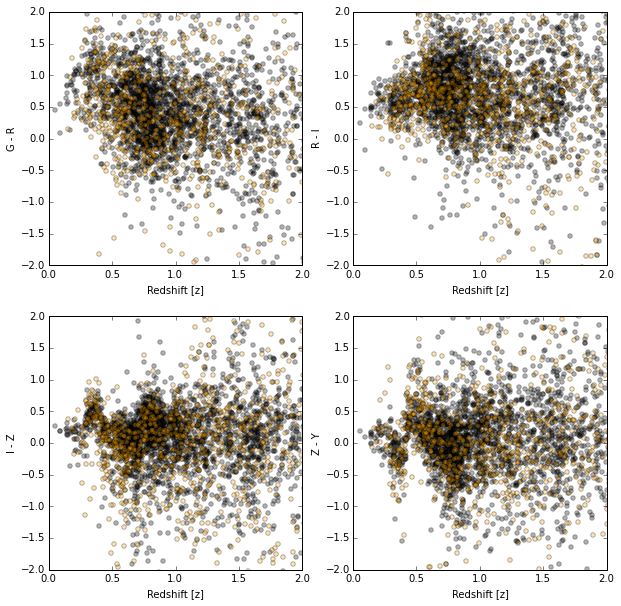

In [13]:




fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
#fig.suptitle("Colors of Quasars - Zoomed In", fontsize = 16, y = 1.04)

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R')
plt.scatter(ZH, galaxy_magGRH, c = 'black', alpha = .3, label = 'BOSS quasars')
plt.scatter(ZL, galaxy_magGRL, c = 'orange', alpha = .3, label = 'low redshift quasars')

ax1.set_ylim([-2, 2])
ax1.set_xlim([0,2])

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I')
plt.scatter(ZH, galaxy_magRIH, c = 'black', alpha = .3)
plt.scatter(ZL, galaxy_magRIL, c = 'orange', alpha = .3)

ax2.set_ylim([-2, 2])
ax2.set_xlim([0,2])

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z')
plt.scatter(ZH, galaxy_magIZH, c = 'black', alpha = .3)
plt.scatter(ZL, galaxy_magIZL, c = 'orange', alpha = .3)


ax3.set_ylim([-2, 2])
ax3.set_xlim([0,2])

ax4 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y')
plt.scatter(ZH, galaxy_magZYH, c = 'black', alpha = .3)
plt.scatter(ZL, galaxy_magZYL, c = 'orange', alpha = .3)

ax4.set_ylim([-2, 2])
ax4.set_xlim([0,2])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


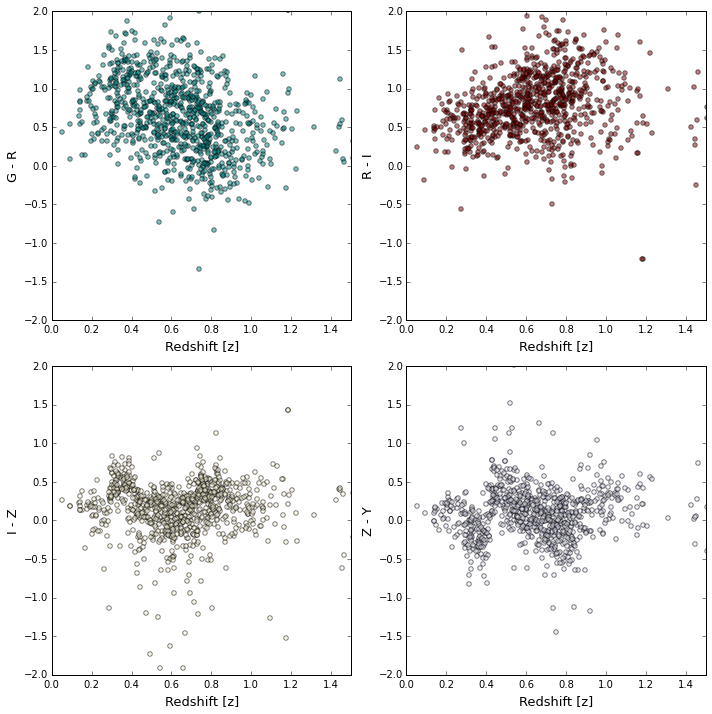

723
726
727
699
192
192
194
171


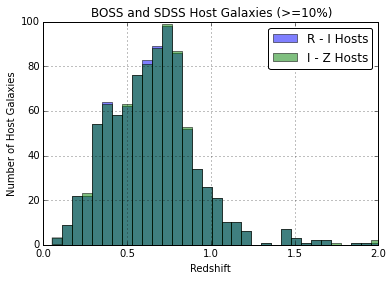

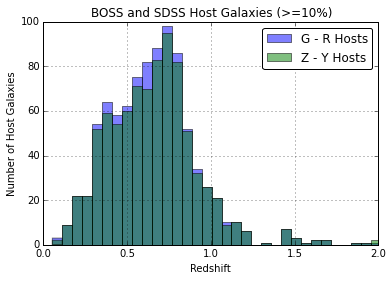

In [20]:
# only 10% of the I BAND for the galaxy color


# HIGH RANGE QUASARS

galaxy_magYH = []
galaxy_magZH = []
galaxy_magIH = []
galaxy_magRH = []
galaxy_magGH = []

i = 0
galmag = 0

for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galmagYH = galaxy_mag(ymagCH[i], ymagPH[i])
        galmagZH = galaxy_mag(zmagCH[i], zmagPH[i])
        galmagIH = galaxy_mag(imagCH[i], imagPH[i])
        galmagRH = galaxy_mag(rmagCH[i], rmagPH[i])
        galmagGH = galaxy_mag(gmagCH[i], gmagPH[i])
        
        galaxy_magYH.append(galmagYH)
        galaxy_magZH.append(galmagZH)
        galaxy_magIH.append(galmagIH)
        galaxy_magRH.append(galmagRH)
        galaxy_magGH.append(galmagGH)
    else:
        galaxy_magYH.append(np.nan)
        galaxy_magZH.append(np.nan)
        galaxy_magIH.append(np.nan)
        galaxy_magRH.append(np.nan)
        galaxy_magGH.append(np.nan)


        
# LOW RANGE QUASARS

galaxy_magYL = []
galaxy_magZL = []
galaxy_magIL = []
galaxy_magRL = []
galaxy_magGL = []


i = 0
galmag = 0

for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galmagYL = galaxy_mag(ymagCL[i], ymagPL[i])
        galmagZL = galaxy_mag(zmagCL[i], zmagPL[i])
        galmagIL = galaxy_mag(imagCL[i], imagPL[i])
        galmagRL = galaxy_mag(rmagCL[i], rmagPL[i])
        galmagGL = galaxy_mag(gmagCL[i], gmagPL[i])
        
        galaxy_magYL.append(galmagYL)
        galaxy_magZL.append(galmagZL)
        galaxy_magIL.append(galmagIL)
        galaxy_magRL.append(galmagRL)
        galaxy_magGL.append(galmagGL)
    else:
        galaxy_magYL.append(np.nan)
        galaxy_magZL.append(np.nan)
        galaxy_magIL.append(np.nan)
        galaxy_magRL.append(np.nan)
        galaxy_magGL.append(np.nan)



        
        
        
        
        
galaxy_magYH = np.asarray(galaxy_magYH)
galaxy_magZH = np.asarray(galaxy_magZH)
galaxy_magIH = np.asarray(galaxy_magIH)
galaxy_magRH = np.asarray(galaxy_magRH)
galaxy_magGH = np.asarray(galaxy_magGH)
        
        
galaxy_magYL = np.asarray(galaxy_magYL)
galaxy_magZL = np.asarray(galaxy_magZL)
galaxy_magIL = np.asarray(galaxy_magIL)
galaxy_magRL = np.asarray(galaxy_magRL)
galaxy_magGL = np.asarray(galaxy_magGL)


#galaxy_magRH = galaxy_magRH[~np.isnan(galaxy_magRH)]

#print len(galaxy_magRH)
#galaxy_magZL = galaxy_magZL[~np.isnan(galaxy_magZL)]
#galaxy_magIL = galaxy_magIL[~np.isnan(galaxy_magIL)]
#galaxy_magRL = galaxy_magRL[~np.isnan(galaxy_magRL)]
#galaxy_magGL = galaxy_magGL[~np.isnan(galaxy_magGL)]

#galaxy_magZH = galaxy_magZH[~np.isnan(galaxy_magZH)]

#print len(galaxy_magYL)
#print len(galaxy_magZL)
#print len(galaxy_magIL)
#print len(galaxy_magRL)
#print len(galaxy_magGL)
#print len(ZL)

#print len(galaxy_magYH)
#print len(galaxy_magZH)
#print len(galaxy_magIH)
#print len(galaxy_magRH)
#print len(galaxy_magGH)
#print len(ZH)




# for plotting the line at 0
zeroy = [0, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 2]
zero = np.zeros(len(zeroy))






fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
#fig.suptitle("Colors of Quasar Hosts where Host Light >= 10%", fontsize = 20, y = 1.04)

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R')
plt.scatter(ZH, galaxy_magGH - galaxy_magRH, c = 'darkcyan', alpha = .5)
plt.scatter(ZL, galaxy_magGL - galaxy_magRL, c = 'darkcyan', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


plt.xlabel('Redshift [z]', fontsize=13)
plt.ylabel('G - R', fontsize=13)

ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I')
plt.scatter(ZH, galaxy_magRH - galaxy_magIH, c = 'maroon', alpha = .5)
plt.scatter(ZL, galaxy_magRL - galaxy_magIL, c = 'maroon', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


plt.xlabel('Redshift [z]', fontsize=13)
plt.ylabel('R - I', fontsize=13)

ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z')
plt.scatter(ZH, galaxy_magIH - galaxy_magZH, c = 'cornsilk', alpha = .5)
plt.scatter(ZL, galaxy_magIL - galaxy_magZL, c = 'cornsilk', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)
ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

plt.xlabel('Redshift [z]', fontsize=13)
plt.ylabel('I - Z', fontsize=13)

#ax3.set_ylim([-2, 2])
#ax3.set_xlim([0,1.5])

ax4 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y')
plt.scatter(ZH, galaxy_magZH - galaxy_magYH, c = 'lavender', alpha = .5)
plt.scatter(ZL, galaxy_magZL - galaxy_magYL, c = 'lavender', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)

ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

plt.xlabel('Redshift [z]', fontsize=13)
plt.ylabel('Z - Y', fontsize=13)

#ax4.set_ylim([-2, 2])
#ax4.set_xlim([0,1.5])

plt.savefig("QHColors10Zoom.png")

fig.tight_layout()
plt.draw()
plt.show()






GHRH = galaxy_magGH - galaxy_magRH
GHRHZ = copy.copy(ZH)
GHRHZ = GHRHZ[~np.isnan(GHRH)]
print len(GHRHZ)

RHIH = galaxy_magRH - galaxy_magIH
RHIHZ = copy.copy(ZH)
RHIHZ = RHIHZ[~np.isnan(RHIH)]
print len(RHIHZ)

IHZH = galaxy_magIH - galaxy_magZH
IHZHZ = copy.copy(ZH)
IHZHZ = IHZHZ[~np.isnan(IHZH)]
print len(IHZHZ)

ZHYH = galaxy_magZH - galaxy_magYH
ZHYHZ = copy.copy(ZH)
ZHYHZ = ZHYHZ[~np.isnan(ZHYH)]
print len(ZHYHZ)


GLRL = galaxy_magGL - galaxy_magRL
GLRLZ = copy.copy(ZL)
GLRLZ = GLRLZ[~np.isnan(GLRL)]
print len(GLRLZ)

RLIL = galaxy_magRL - galaxy_magIL
RLILZ = copy.copy(ZL)
RLILZ = RLILZ[~np.isnan(RLIL)]
print len(RLILZ)

ILZL = galaxy_magIL - galaxy_magZL
ILZLZ = copy.copy(ZL)
ILZLZ = ILZLZ[~np.isnan(ILZL)]
print len(ILZLZ)

ZLYL = galaxy_magZL - galaxy_magYL
ZLYLZ = copy.copy(ZL)
ZLYLZ = ZLYLZ[~np.isnan(ZLYL)]
print len(ZLYLZ)

RIZtotal = np.concatenate((RHIHZ,RLILZ))
IZZtotal = np.concatenate((IHZHZ,ILZLZ))
GRZtotal = np.concatenate((GHRHZ,GLRLZ))
ZYZtotal = np.concatenate((ZHYHZ,ZLYLZ))


fig = plt.figure()

# the histogram of the data

#pyplot.hist(GHRHZ, 75, normed=0, alpha=.5, label = 'G - R BOSS Hosts')

pyplot.hist(RIZtotal, 75, normed=0, alpha=.5, label = 'R - I Hosts')

pyplot.hist(IZZtotal, 75, normed=0, alpha=.5, label = 'I - Z Hosts')

#pyplot.hist(ZHYHZ, 75, normed=0,  alpha=.5, label = 'Z - Y BOSS Hosts')



plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=False)
plt.xlabel('Redshift')
plt.ylabel('Number of Host Galaxies')
plt.title('BOSS and SDSS Host Galaxies (>=10%)')
plt.grid(True)
plt.xlim(0,2)
plt.show()






fig = plt.figure()

pyplot.hist(GRZtotal, 75, normed=0, alpha=.5, label = 'G - R Hosts')

pyplot.hist(ZYZtotal, 75, normed=0, alpha=.5, label = 'Z - Y Hosts')


plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=False)
plt.xlabel('Redshift')
plt.ylabel('Number of Host Galaxies')
plt.title('BOSS and SDSS Host Galaxies (>=10%)')
plt.grid(True)
plt.xlim(0,2)
plt.show()




#ax5 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y')





In [15]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = zmagPH - ymagPH
colorL = zmagPL - ymagPL
colortext = 'Z - Y'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magZH - galaxy_magYH
galaxyLcolor = galaxy_magZL - galaxy_magYL



######



        
xH10 = ZH
xL10 = ZL
colorH10 = zmagPH - ymagPH
colorL10 = zmagPL - ymagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magZH10 = np.asarray(galaxy_magZH10)
galaxy_magYH10 = np.asarray(galaxy_magYH10)
galaxy_magZL10 = np.asarray(galaxy_magZL10)
galaxy_magYL10 = np.asarray(galaxy_magYL10)

galaxyH10color = galaxy_magZH10 - galaxy_magYH10
galaxyL10color = galaxy_magZL10 - galaxy_magYL10


xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')

# galaxy colors







plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


print running_medianGH
print running_medianGL




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax5.set_ylim([-2, 2])
ax5.set_xlim([0,1.5])




/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in divide


NameError: name 'galaxy_magZH10' is not defined

In [ ]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = imagPH - zmagPH
colorL = imagPL - zmagPL
colortext = 'I - Z'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magIH - galaxy_magZH
galaxyLcolor = galaxy_magIL - galaxy_magZL

## info for second plots (10% limit)
i = 0
galmag = 0
galaxy_magIH10 = []
galaxy_magZH10 = []
for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIH10.append(galmag)
    else:
        galaxy_magIH10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPH)):
    galmag = galaxy_mag(zmagCH[i], zmagPH[i])
    if galmag - zmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZH10.append(galmag)
    else:
        galaxy_magZH10.append(np.nan)

####
i = 0
galmag = 0
galaxy_magIL10 = []
galaxy_magZL10 = []
for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIL10.append(galmag)
    else:
        galaxy_magIL10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPL)):
    galmag = galaxy_mag(zmagCL[i], zmagPL[i])
    if galmag - zmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZL10.append(galmag)
    else:
        galaxy_magZL10.append(np.nan)

        
        
xH10 = ZH
xL10 = ZL
colorH10 = imagPH - zmagPH
colorL10 = imagPL - zmagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magIH10 = np.asarray(galaxy_magIH10)
galaxy_magZH10 = np.asarray(galaxy_magZH10)
galaxy_magIL10 = np.asarray(galaxy_magIL10)
galaxy_magZL10 = np.asarray(galaxy_magZL10)

galaxyH10color = galaxy_magIH10 - galaxy_magZH10
galaxyL10color = galaxy_magIL10 - galaxy_magZL10

xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)

plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('I - Z', fontsize=14)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')

# galaxy colors




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize =13)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)
plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('I - Z', fontsize=14)


plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax5.set_ylim([-2, 2])
ax5.set_xlim([0,1.5])




In [ ]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = rmagPH - imagPH
colorL = rmagPL - imagPL
colortext = 'R - I'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magRH - galaxy_magIH
galaxyLcolor = galaxy_magRL - galaxy_magIL

## info for second plots (10% limit)
i = 0
galmag = 0
galaxy_magRH10 = []
galaxy_magIH10 = []
for i in range(len(rmagPH)):
    galmag = galaxy_mag(rmagCH[i], rmagPH[i])
    if galmag - rmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magRH10.append(galmag)
    else:
        galaxy_magRH10.append(np.nan)
i = 0
galmag = 0

for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIH10.append(galmag)
    else:
        galaxy_magIH10.append(np.nan)

####
i = 0
galmag = 0
galaxy_magRL10 = []
galaxy_magIL10 = []
for i in range(len(rmagPL)):
    galmag = galaxy_mag(rmagCL[i], rmagPL[i])
    if galmag - rmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magRL10.append(galmag)
    else:
        galaxy_magRL10.append(np.nan)
i = 0
galmag = 0

for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIL10.append(galmag)
    else:
        galaxy_magIL10.append(np.nan)

        
        
xH10 = ZH
xL10 = ZL
colorH10 = rmagPH - imagPH
colorL10 = rmagPL - imagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magRH10 = np.asarray(galaxy_magRH10)
galaxy_magIH10 = np.asarray(galaxy_magIH10)
galaxy_magRL10 = np.asarray(galaxy_magRL10)
galaxy_magIL10 = np.asarray(galaxy_magIL10)

galaxyH10color = galaxy_magRH10 - galaxy_magIH10
galaxyL10color = galaxy_magRL10 - galaxy_magIL10

xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)





# galaxy colors







plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('R - I', fontsize=14)

#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('R - I', fontsize=14)






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)



plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

#ax5.set_ylim([-2, 2])
#ax5.set_xlim([0,1.5])




In [ ]:
### fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = gmagPH - rmagPH
colorL = gmagPL - rmagPL
colortext = 'G - R'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magGH - galaxy_magRH
galaxyLcolor = galaxy_magGL - galaxy_magRL

## info for second plots (10% limit)
i = 0
galmag = 0
galaxy_magGH10 = []
galaxy_magRH10 = []
for i in range(len(rmagPH)):
    galmag = galaxy_mag(rmagCH[i], rmagPH[i])
    if galmag - rmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magRH10.append(galmag)
    else:
        galaxy_magRH10.append(np.nan)
i = 0
galmag = 0

for i in range(len(gmagPH)):
    galmag = galaxy_mag(gmagCH[i], gmagPH[i])
    if galmag - gmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magGH10.append(galmag)
    else:
        galaxy_magGH10.append(np.nan)

####
i = 0
galmag = 0
galaxy_magRL10 = []
galaxy_magGL10 = []
for i in range(len(rmagPL)):
    galmag = galaxy_mag(rmagCL[i], rmagPL[i])
    if galmag - rmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magRL10.append(galmag)
    else:
        galaxy_magRL10.append(np.nan)
i = 0
galmag = 0

for i in range(len(gmagPL)):
    galmag = galaxy_mag(gmagCL[i], gmagPL[i])
    if galmag - gmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magGL10.append(galmag)
    else:
        galaxy_magGL10.append(np.nan)

        
        
xH10 = ZH
xL10 = ZL
colorH10 = gmagPH - rmagPH
colorL10 = gmagPL - rmagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magGH10 = np.asarray(galaxy_magGH10)
galaxy_magRH10 = np.asarray(galaxy_magRH10)
galaxy_magGL10 = np.asarray(galaxy_magGL10)
galaxy_magRL10 = np.asarray(galaxy_magRL10)

galaxyH10color = galaxy_magGH10 - galaxy_magRH10
galaxyL10color = galaxy_magGL10 - galaxy_magRL10

xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)





# galaxy colors







plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')

#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax5.set_ylim([-2, 2])
ax5.set_xlim([0,1.5])




In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




xH = ZH
xL = ZL
colorH = imagPH - zmagPH
colorL = imagPL - zmagPL
colortext = 'I - Z'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magIH - galaxy_magZH
galaxyLcolor = galaxy_magIL - galaxy_magZL





# plots start

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############
# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')

#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




xH = ZH
xL = ZL
colorH = rmagPH - imagPH
colorL = rmagPL - imagPL
colortext = 'R - I'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magRH - galaxy_magIH
galaxyLcolor = galaxy_magRL - galaxy_magIL





# plots start

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############
# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




xH = ZH
xL = ZL
colorH = gmagPH - rmagPH
colorL = gmagPL - rmagPL
colortext = 'G - R'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magGH - galaxy_magRH
galaxyLcolor = galaxy_magGL - galaxy_magRL





# plots start

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############
# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


In [ ]:
### quasar color mediums

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




xH = ZH
yH = zmagPH - ymagPH

xH = xH[~np.isnan(yH)]
yH = yH[~np.isnan(yH)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=yH)
mean = syH / nH


total_bins = 75


ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'I - Z (PSF)')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL  = np.digitize(ZH,bins)

running_medianIZH = [np.median((imagPH - zmagPH)[idxH==k]) for k in range(total_bins)]
#running_medianIZL = [np.median((imagPL - zmagPL)[idxL==k]) for k in range(total_bins)]

plt.plot(bins-delta/2,running_medianIZH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
#plt.plot(bins-delta/2,running_medianIZL,'b.',lw=5,alpha=1.0, label = 'Median of low Z Quasar Color')




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'I - Z (galaxy)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############
# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(ZH,bins)
running_medianIZGH = [np.median((galaxy_magIH - galaxy_magZH)[idx==k]) for k in range(total_bins)]




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'I - Z (galaxy)')

plt.plot(bins-delta/2,running_medianIZGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Quasar Host Color')
plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(ZL,bins)
running_medianIZGL = [np.median((galaxy_magIL - galaxy_magZL)[idx==k]) for k in range(total_bins)]



plt.plot(bins-delta/2,running_medianIZGL,'b.',lw=5,alpha=1.0, label = 'Median of low Z Quasar Host Color')

#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




xL = ZL
yL = zmagPL - ymagPL

xL = xL[~np.isnan(yL)]
yL = yL[~np.isnan(yL)]
nbins = 200

n, _ = np.histogram(xL, bins=nbins)
sy, _ = np.histogram(xL, bins=nbins, weights=yL)
mean = sy / n


total_bins = 75


ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'Z - Y (PSF)')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(ZL,bins)
running_medianZYL = [np.median((zmagPL - ymagPL)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianZYL,'b.',lw=5,alpha=.8, label = 'Median of Low ZQuasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')

plt.plot(bins-delta/2,running_medianZYL,'b.',lw=5,alpha=1.0, label = 'Median of low Z Quasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)



# starting with low Z quasars


xL = ZL

print len(imagPL)
print len(zmagPL)


for i in range(2718):
    if imagPL[i] == 0 or zmagPL[i] == 0:
        yL[i] = 0
    else:
        yL[i] = imagPL[i] - zmagPL[i]
    
#yL = imagPL - zmagPL
### take care of 0's individually for each color beforehand

xL = xL[~np.isnan(yL)]
yL = yL[~np.isnan(yL)]
print yL[2646] ##########

#xL = xL[np.nonzero(yL)]
#yL = yL[np.nonzero(yL)]
print yL[2646]

yGal = galaxy_magIL - galaxy_magZL

nbins = 200

n, _ = np.histogram(xL, bins=nbins)
sy, _ = np.histogram(xL, bins=nbins, weights=yL)
mean = sy / n

#print len(yGal)
#print yGal[]
#print imagPL[2646]
#print zmagPL[2646]


ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'I - Z (PSF)')
plt.scatter(xL, yL, c = 'cornsilk', alpha = .3, label = 'I - Z Quasar Color')


for i in range(len(yL)):
    if yL[i] > 10:
        print i

print yL[481]
print imagPL[481]
print zmagPL[481]



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxL  = np.digitize(xL,bins)
running_medianIZL = [np.median((yL)[idxL==k]) for k in range(total_bins)]
running_medianGal = [np.median((yGal)[idxL==k]) for k in range(total_bins)]

#plt.plot(bins-delta/2,running_medianIZL,'r.',lw=5,alpha=.8, label = 'Median of low Z Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'I - Z (galaxy)')
plt.scatter(ZL, galaxy_magIL - galaxy_magZL, c = 'cornsilk', alpha = .3, label = 'I - Z Galaxy Color LOW')


plt.plot(bins-delta/2,running_medianIZL,'r.',lw=5,alpha=1.0, label = 'Median of low Z Quasar Color')
plt.plot(bins-delta/2,running_medianGal,'b.',lw=5,alpha=1.0, label = 'Median of low Z Quasar HOST Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])